In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# open the data
df = pd.read_csv('fraud.csv')

In [4]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [5]:
# statistics of dataframe
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# information about the dataframe
# There's not null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


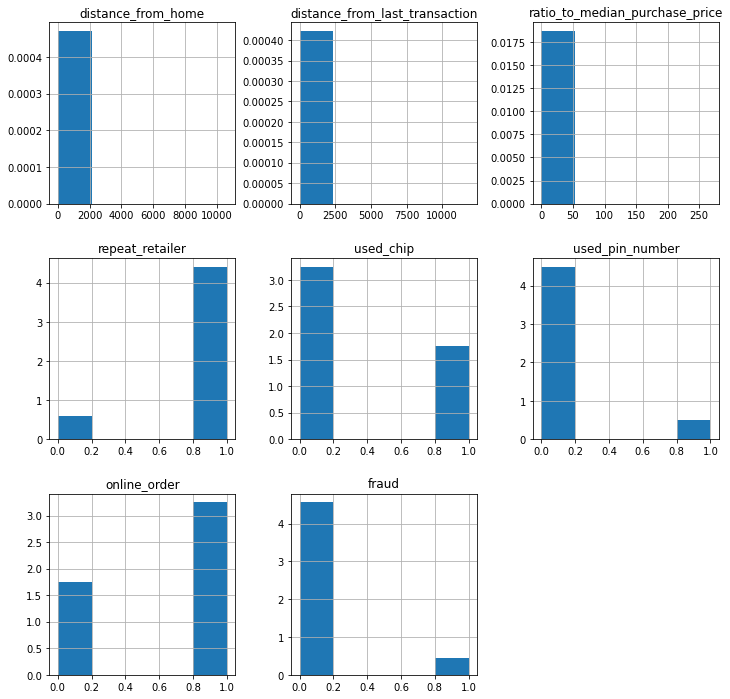

In [7]:
# histogram of all columns of dataframe

df.hist(bins=5, figsize=(12,12), density=True)
plt.show()

In [8]:
# we can divide the dataframe in two dataframes, to make analysis in fraud transactions and normal transactions 
df_fraud = df[df['fraud'] == 1]
df_notfraud = df[df['fraud'] == 0]

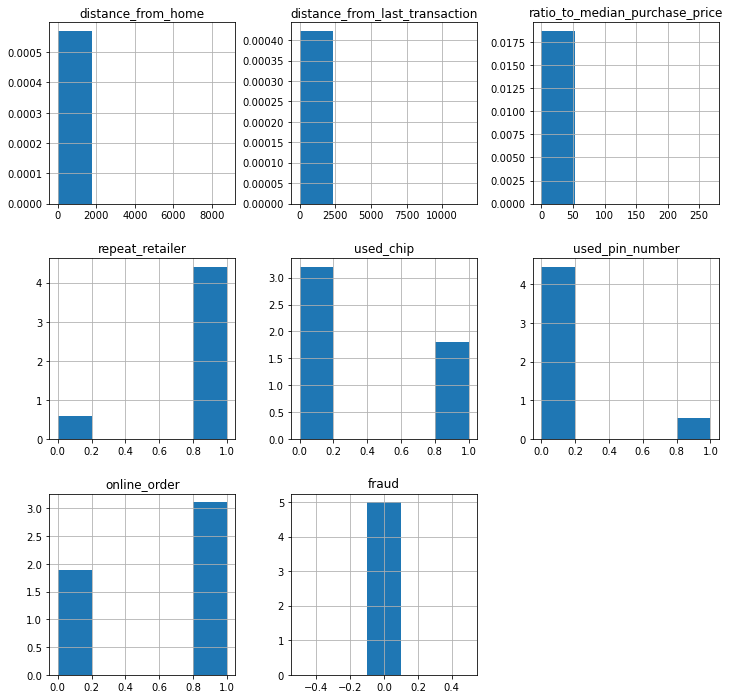

In [9]:
# histogram normal transactions
df_notfraud.hist(bins=5, figsize=(12,12), density=True)
plt.show()

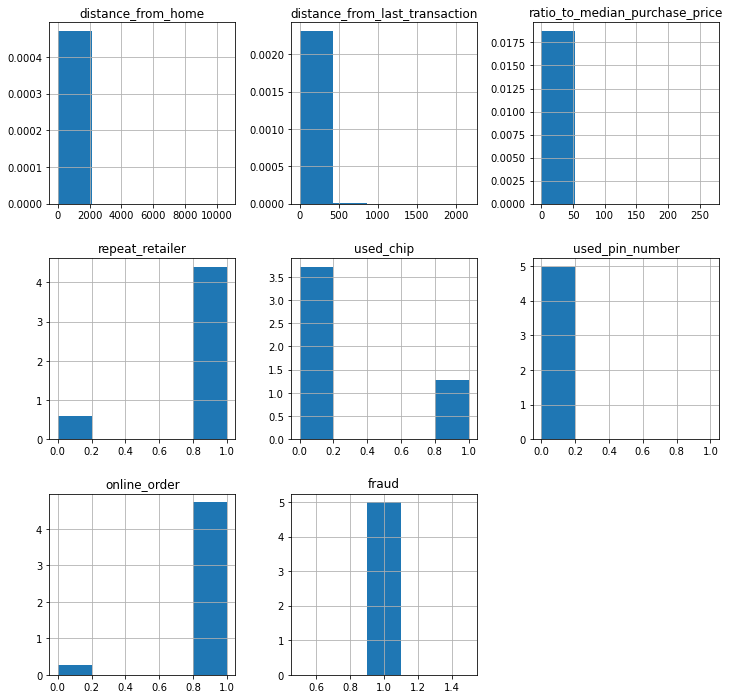

In [10]:
# histogram fraud transactions
df_fraud.hist(bins=5, figsize=(12,12), density=True)
plt.show()

In [11]:
# 99% of frauds transactions don't utilized the Pin Number in transaction. 

count = df_fraud['used_pin_number'].value_counts()
print(f"Transactions not used Pin Number: {count[0]}")
print(f"\nTransactions used Pin Number: {count[1]}")

Transactions not used Pin Number: 87130

Transactions used Pin Number: 273


In [12]:
# The median of distance from last transaction of frauds transactions is three more than normal transactions

mean_frauds = df_fraud['distance_from_last_transaction'].mean()
mean_notfrauds = df_notfraud['distance_from_last_transaction'].mean()
print(f"Mean of distance from last transaction of frauds transactions : {round(mean_frauds,2)} ")
print(f"\nMean of distance from last transaction of no frauds transactions : {round(mean_notfrauds,2)} ")

Mean of distance from last transaction of frauds transactions : 12.71 

Mean of distance from last transaction of no frauds transactions : 4.3 


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

<AxesSubplot:xlabel='fraud', ylabel='count'>

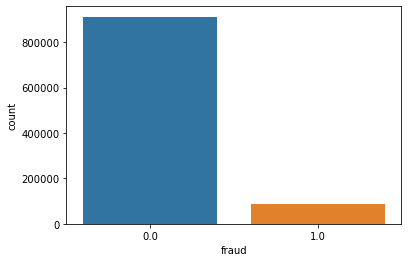

In [14]:
# it's so disproportionate number of samples each classes
# we can use the oversampling to balance the classes through the creation new data
sns.countplot (x = df['fraud'])

In [15]:
# defining the features to models
x = df.drop('fraud', axis = 1).values
y = df['fraud'].values

In [16]:
# there's 912597 samples to normal transactions and only 87403 for frauds, that's can spoil the models performance
np.unique(y, return_counts = True)

(array([0., 1.]), array([912597,  87403], dtype=int64))

In [17]:
# appling the oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x_over, y_over = smote.fit_resample(x,y)

before there was 1000000 data, but now there's :  1825194


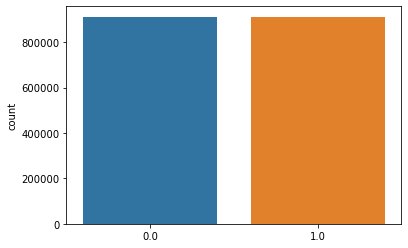

In [92]:
# With applied to oversampling, now there's same number of samples to both classes
sns.countplot (x = y_over)
print("before there was 1000000 data, but now there's : ",x_over.shape[0],)

In [19]:
# standardization of data
scaler = StandardScaler()
x = scaler.fit_transform(x_over)

In [20]:
# splitting the data in train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y_over,test_size = 0.3, random_state = 0) 

In [21]:
# training the models
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

naive_bayers = GaussianNB()
naive_bayers.fit(x_train,y_train)

logistic = LogisticRegression()
logistic.fit(x_train,y_train)

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
# predictions of models
tree_pred = tree.predict(x_test)
knn_pred = knn.predict(x_test)
naive_pred = naive_bayers.predict(x_test)
logistic_pred = logistic.predict(x_test)

In [91]:
# Accucary of models 
print("accuracy of KNN                 ", accuracy_score(y_test, knn_pred))
print("\naccuracy of Naive Bayers        ", accuracy_score(y_test,naive_pred))
print("\naccuracy of Logistic Regression ", accuracy_score(y_test,logistic_pred))
print("\naccuracy of Decision Tree       ", accuracy_score(y_test,tree_pred))

accuracy of KNN                  0.9991087718401122

accuracy of Naive Bayers         0.8318482574480558

accuracy of Logistic Regression  0.9414254902211451

accuracy of Decision Tree        0.9999799108406583


In [62]:
# confusion matrix of KNN
confusion_matrix(y_test, knn_pred)

array([[273626,    448],
       [    40, 273445]], dtype=int64)

<AxesSubplot:>

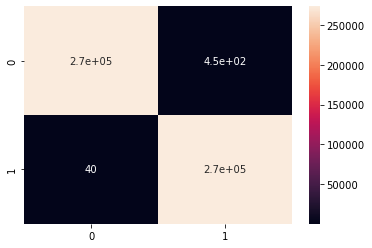

In [69]:
cm=confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True)

In [70]:
# confusion matrix of Decision Tree
confusion_matrix(y_test, tree_pred)

array([[274073,      1],
       [    10, 273475]], dtype=int64)

<AxesSubplot:>

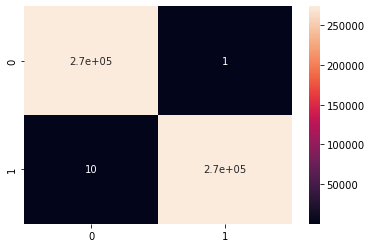

In [71]:
cm=confusion_matrix(y_test, tree_pred)
sns.heatmap(cm, annot=True) 

In [72]:
# Other metrics of KNN model:
print(classification_report(y_test, knn_pred) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    274074
         1.0       1.00      1.00      1.00    273485

    accuracy                           1.00    547559
   macro avg       1.00      1.00      1.00    547559
weighted avg       1.00      1.00      1.00    547559



In [73]:
# Other metrics of Decision Tree model:
print(classification_report(y_test, tree_pred) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    274074
         1.0       1.00      1.00      1.00    273485

    accuracy                           1.00    547559
   macro avg       1.00      1.00      1.00    547559
weighted avg       1.00      1.00      1.00    547559



In [ ]:
# The KNN and Decision Tree was the models with best performance.

# The majority frauds transactions happen without use Pin Number, so Pin Number can help to identify frauds

# And frauds transactions have a averange of distance from last transaction longer than normal transaction,
# so that's can be another feature to identify the frauds